In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('data/labels.csv')

# Count the number of occurrences of each class in the target feature
class_counts = data['Diabetes_012'].value_counts()
min_class_count = class_counts.min()

# Create a balanced dataset
balanced_data = data.groupby('Diabetes_012').apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)

# Print the number of rows for each class and the total size of the new dataset
print(f"Number of rows for each class (0, 1, 2): {min_class_count}")
print(f"Total size of the new balanced dataset: {balanced_data.shape[0]}")

data = balanced_data

Number of rows for each class (0, 1, 2): 4631
Total size of the new balanced dataset: 13893


Number of features: 21
Explained variance for component (3D): [0.16400517 0.08430875 0.06391192]
Total explained variance (3D): 0.31222584368425216
Reconstruction error MAE (3D): 0.600172286319541


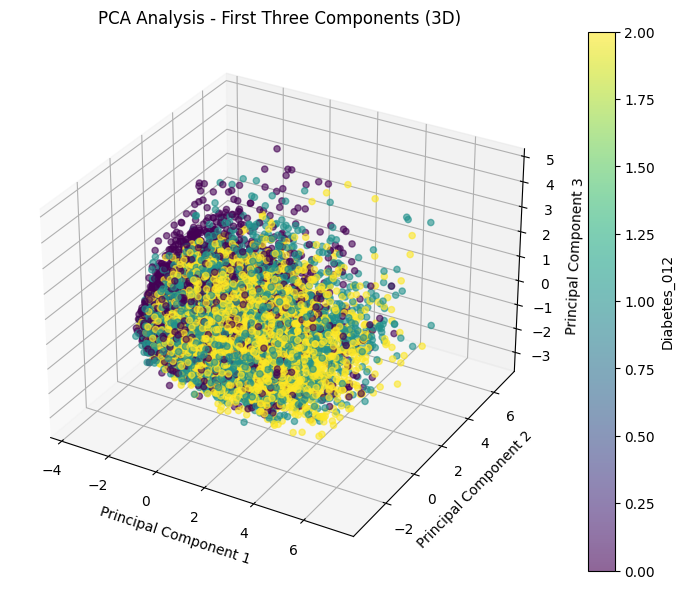

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

# Separate features and target
features = data.drop(columns=['Diabetes_012'])
target = data['Diabetes_012']
print("Number of features:", features.shape[1])

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3)
pca_components_3d = pca_3d.fit_transform(features_scaled)
explained_variance_3d = pca_3d.explained_variance_ratio_
reconstruction_3d = pca_3d.inverse_transform(pca_components_3d)
reconstruction_error_3d = mean_absolute_error(features_scaled, reconstruction_3d)

# Output explained variance and reconstruction error
print("Explained variance for component (3D):", explained_variance_3d)
print("Total explained variance (3D):", explained_variance_3d.sum())
print("Reconstruction error MAE (3D):", reconstruction_error_3d)

# Plotting 3D PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_components_3d[:, 0], pca_components_3d[:, 1], pca_components_3d[:, 2], c=target, cmap='viridis', alpha=0.6)
fig.colorbar(scatter, label='Diabetes_012')
ax.set_title('PCA Analysis - First Three Components (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

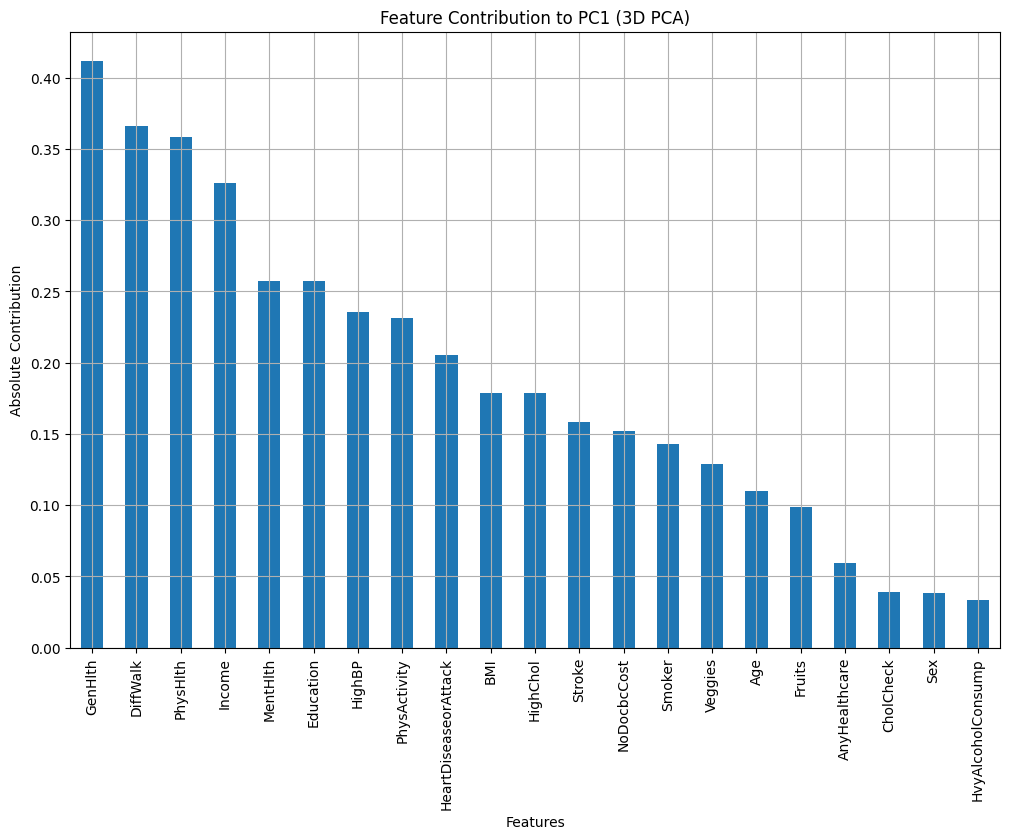

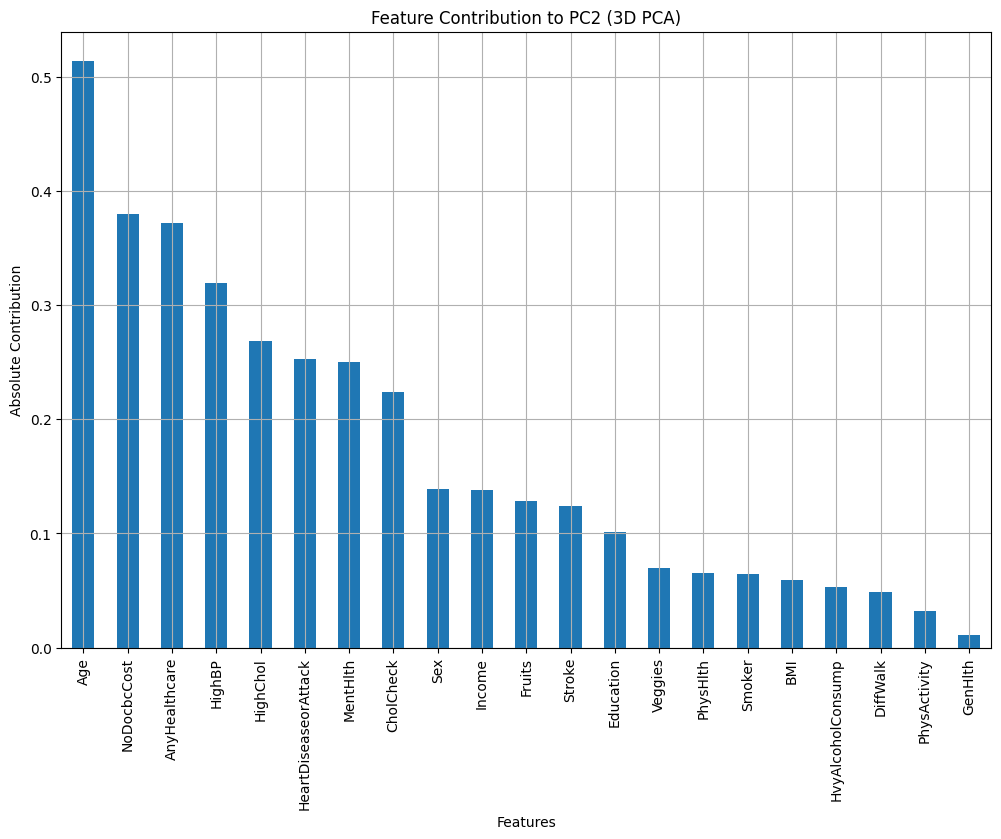

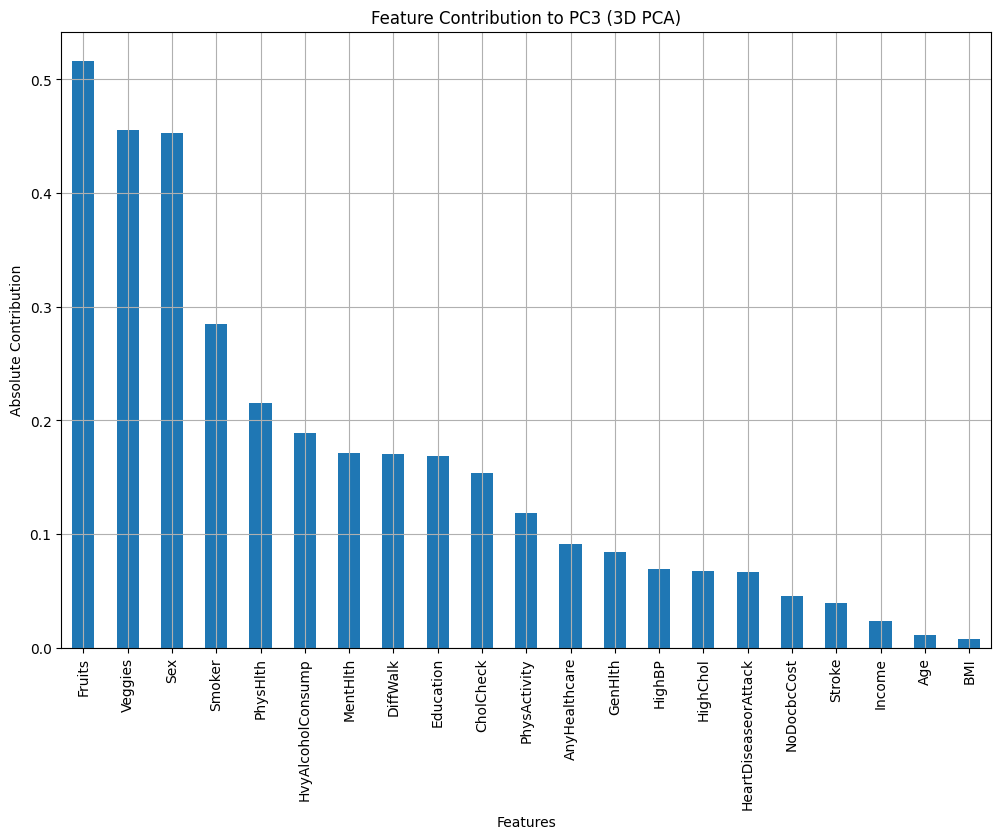

In [3]:
# Contribution of features to each component
components_3d_contribution = pd.DataFrame(pca_3d.components_, columns=features.columns, index=['PC1', 'PC2', 'PC3'])

components_3d_contribution_abs = components_3d_contribution.loc['PC1'].abs().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
components_3d_contribution_abs.plot(kind='bar')
plt.title('Feature Contribution to PC1 (3D PCA)')
plt.xlabel('Features')
plt.ylabel('Absolute Contribution')
plt.grid(True)
plt.show()

components_3d_contribution_abs = components_3d_contribution.loc['PC2'].abs().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
components_3d_contribution_abs.plot(kind='bar')
plt.title('Feature Contribution to PC2 (3D PCA)')
plt.xlabel('Features')
plt.ylabel('Absolute Contribution')
plt.grid(True)
plt.show()

components_3d_contribution_abs = components_3d_contribution.loc['PC3'].abs().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
components_3d_contribution_abs.plot(kind='bar')
plt.title('Feature Contribution to PC3 (3D PCA)')
plt.xlabel('Features')
plt.ylabel('Absolute Contribution')
plt.grid(True)
plt.show()

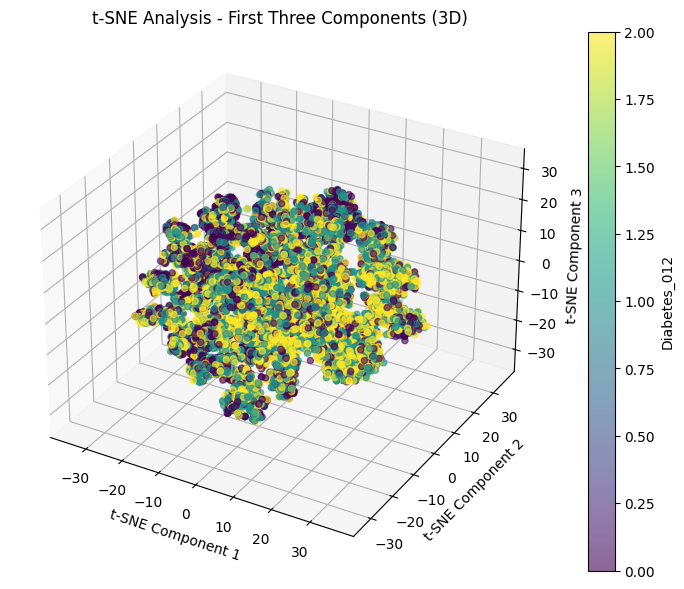

In [4]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target
features = data.drop(columns=['Diabetes_012'])
target = data['Diabetes_012']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# t-SNE with 3 components for 3D visualization
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_components_3d = tsne_3d.fit_transform(features_scaled)

# Plotting 3D t-SNE
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_components_3d[:, 0], tsne_components_3d[:, 1], tsne_components_3d[:, 2], c=target, cmap='viridis', alpha=0.6)
fig.colorbar(scatter, label='Diabetes_012')
ax.set_title('t-SNE Analysis - First Three Components (3D)')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()

2024-10-30 10:55:54.337897: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 2s 708us/step - loss: 0.9607
Epoch 2/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - loss: 0.7503
Epoch 3/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - loss: 0.6756
Epoch 4/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - loss: 0.6398
Epoch 5/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - loss: 0.6158
Epoch 6/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - loss: 0.5985
Epoch 7/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - loss: 0.5936
Epoch 8/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - loss: 0.5892
Epoch 9/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - loss: 0.5792
Epoch 10/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - loss: 0.5801
Epoch 11/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - loss: 0.5718
Epoch 12/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - loss: 0.5785
Epoch 13/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - loss: 0.5748
Epoch 14/25
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - loss: 0.5711
Epoch 15/25
869/869 ━━━━━━━━━

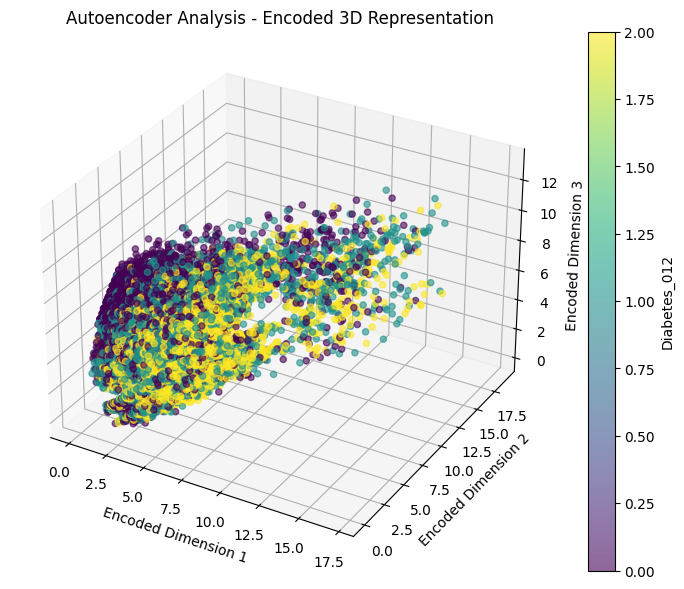

Reconstruction error (3D Autoencoder): 0.5281037238582657


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Separate features and target
features = data.drop(columns=['Diabetes_012'])
target = data['Diabetes_012']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Autoencoder model for 2D representation
input_dim = features_scaled.shape[1]
input_layer = Input(shape=(input_dim,))

# Autoencoder model for 3D representation
encoder_3d = Dense(10, activation='relu')(input_layer)
encoder_3d = Dense(3, activation='relu')(encoder_3d)
decoder_3d = Dense(10, activation='relu')(encoder_3d)
decoder_3d = Dense(input_dim, activation='linear')(decoder_3d)
autoencoder_3d = Model(inputs=input_layer, outputs=decoder_3d)

# Compile and train the model
autoencoder_3d.compile(optimizer='adam', loss='mse')
autoencoder_3d.fit(features_scaled, features_scaled, epochs=25, batch_size=16, shuffle=True, verbose=True)

# Extract 3D encoded representation and compute reconstruction error
encoder_model_3d = Model(inputs=input_layer, outputs=encoder_3d)
encoded_features_3d = encoder_model_3d.predict(features_scaled)
reconstructed_features_3d = autoencoder_3d.predict(features_scaled)
reconstruction_error_3d = mean_absolute_error(features_scaled, reconstructed_features_3d)

# Plotting 3D encoded data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_features_3d[:, 0], encoded_features_3d[:, 1], encoded_features_3d[:, 2], c=target, cmap='viridis', alpha=0.6)
fig.colorbar(scatter, label='Diabetes_012')
ax.set_title('Autoencoder Analysis - Encoded 3D Representation')
ax.set_xlabel('Encoded Dimension 1')
ax.set_ylabel('Encoded Dimension 2')
ax.set_zlabel('Encoded Dimension 3')
plt.show()

print("Reconstruction error (3D Autoencoder):", reconstruction_error_3d)